# WeatherPy
----

### Analysis
* Temperatures are warmer toward the equator (0 latitude). But with the limitation of the free API we're using, we are limited to only check the current temperatures across the globe. A better test would be to get the temperature on the date of the spring or fall equinox so that the northern- and southern-most cites are not at their summer or winter extremes.
* Cloudiness is distributed evenly across the latitudes.
* Wind speed is distributed evenly across the latitudes. 
* A more interesting question for cloudiness would be to check be altitude, which is not returned as part of the Open Weather API.

---



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from datetime import date
from config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#size was 1500, lowering for now
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


In [5]:
city_name = []
cloudiness = []
countries = []
dates = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []

In [6]:
totalcities = len(cities)
i = 1

print("Beginning Weather Data Retrieval")
print("--------------------------------")
for city in cities:
    try:
        print(f"Processing {city} -- number {i} of {totalcities}....")
        i+=1
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        countries.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        time.sleep(1.02)
    except:
        print(f"Not able to process {city}. Moving to next city.")
        
print(f"All done! Processed {len(city_name)} of {totalcities} total cities.")    


Beginning Weather Data Retrieval
--------------------------------
Processing castro -- number 1 of 596....
Processing illoqqortoormiut -- number 2 of 596....
Not able to process illoqqortoormiut. Moving to next city.
Processing fortuna -- number 3 of 596....
Processing korla -- number 4 of 596....
Not able to process korla. Moving to next city.
Processing jamestown -- number 5 of 596....
Processing katsuura -- number 6 of 596....
Processing alyangula -- number 7 of 596....
Processing tuatapere -- number 8 of 596....
Processing kodinsk -- number 9 of 596....
Processing yar-sale -- number 10 of 596....
Processing dikson -- number 11 of 596....
Processing ushuaia -- number 12 of 596....
Processing new norfolk -- number 13 of 596....
Processing taolanaro -- number 14 of 596....
Not able to process taolanaro. Moving to next city.
Processing vostok -- number 15 of 596....
Processing belyy yar -- number 16 of 596....
Processing tutoia -- number 17 of 596....
Processing kahului -- number 18 of

Processing bethel -- number 161 of 596....
Processing palu -- number 162 of 596....
Processing ixtapa -- number 163 of 596....
Processing omsukchan -- number 164 of 596....
Processing belaya gora -- number 165 of 596....
Processing kudahuvadhoo -- number 166 of 596....
Processing tallahassee -- number 167 of 596....
Processing talcahuano -- number 168 of 596....
Processing bourges -- number 169 of 596....
Processing hermagor -- number 170 of 596....
Processing dumas -- number 171 of 596....
Processing halalo -- number 172 of 596....
Not able to process halalo. Moving to next city.
Processing botou -- number 173 of 596....
Processing kapoeta -- number 174 of 596....
Not able to process kapoeta. Moving to next city.
Processing otjiwarongo -- number 175 of 596....
Processing palmer -- number 176 of 596....
Processing provideniya -- number 177 of 596....
Processing royan -- number 178 of 596....
Processing iranshahr -- number 179 of 596....
Processing elko -- number 180 of 596....
Processi

Processing buala -- number 328 of 596....
Processing alamogordo -- number 329 of 596....
Processing sulphur springs -- number 330 of 596....
Processing morant bay -- number 331 of 596....
Processing gwanda -- number 332 of 596....
Processing ketchikan -- number 333 of 596....
Processing nabire -- number 334 of 596....
Processing hofn -- number 335 of 596....
Processing hihifo -- number 336 of 596....
Not able to process hihifo. Moving to next city.
Processing gizo -- number 337 of 596....
Processing lipin bor -- number 338 of 596....
Processing morgan city -- number 339 of 596....
Processing lieksa -- number 340 of 596....
Processing takoradi -- number 341 of 596....
Processing bargal -- number 342 of 596....
Not able to process bargal. Moving to next city.
Processing hirara -- number 343 of 596....
Processing namatanai -- number 344 of 596....
Processing richards bay -- number 345 of 596....
Processing iqaluit -- number 346 of 596....
Processing beyneu -- number 347 of 596....
Process

Processing alencon -- number 491 of 596....
Processing sakaiminato -- number 492 of 596....
Processing samalaeulu -- number 493 of 596....
Not able to process samalaeulu. Moving to next city.
Processing crixas -- number 494 of 596....
Processing sao jose da coroa grande -- number 495 of 596....
Processing mackay -- number 496 of 596....
Processing namwala -- number 497 of 596....
Processing tura -- number 498 of 596....
Processing shahrud -- number 499 of 596....
Processing maceio -- number 500 of 596....
Processing sandnessjoen -- number 501 of 596....
Processing ajaccio -- number 502 of 596....
Processing ulaangom -- number 503 of 596....
Processing mayo -- number 504 of 596....
Processing sobolevo -- number 505 of 596....
Processing mount pleasant -- number 506 of 596....
Processing de-kastri -- number 507 of 596....
Processing siniscola -- number 508 of 596....
Processing mjolby -- number 509 of 596....
Processing ouegoa -- number 510 of 596....
Processing kutoarjo -- number 511 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_dict = {
                "City":city_name,
                "Country":countries,
                "Cloudiness":cloudiness,
                "Date":dates,
                "Humidity":humidity,
                "Latitude":lat,
                "Longitude":long,
                "Max Temp":max_temp,
                "Wind Speed":wind_speed   
            }

city_data_df = pd.DataFrame(city_dict)
#write and save to CSV
city_data_csv = city_data_df.to_csv('city_data.csv',header = True)

#preview the df
city_data_df.head()

City Country  Cloudiness        Date  Humidity  Latitude  Longitude  \
0     Castro      CL          75  1551132000        62    -42.48     -73.76   
1    Fortuna      ES           0  1551133058        87     38.18      -1.13   
2  Jamestown      AU           0  1551133097        66    -33.21     138.60   
3   Katsuura      JP          40  1551132739        87     33.93     134.50   
4  Alyangula      AU          76  1551129720       100    -13.85     136.42   

   Max Temp  Wind Speed  
0     59.00       12.75  
1     51.01        4.70  
2     59.67        4.16  
3     48.20        4.70  
4     77.00        5.73

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

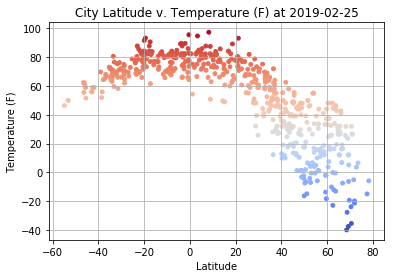

In [8]:
time = city_data_df["Date"].mean()
time = date.fromtimestamp(time)

# chose the coolwarm colormap to better indicate changes in temperature
plt.scatter(city_data_df["Latitude"], city_data_df["Max Temp"], c=city_data_df["Max Temp"], s=15, cmap = "coolwarm", marker = "o")

plt.title(f"City Latitude v. Temperature (F) at {time}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
# save and show the plot
plt.savefig("images/Lat_v_Temp.png")
plt.show()




#### Latitude vs. Humidity Plot

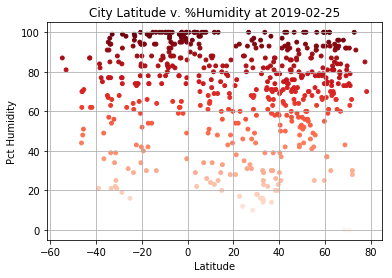

In [9]:
# chose the Reds colormap to better indicate humidity intensity
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity"], c=city_data_df["Humidity"], s=15, cmap = "Reds", marker = "o")


plt.title(f"City Latitude v. %Humidity at {time}")
plt.xlabel("Latitude")
plt.ylabel("Pct Humidity")
plt.grid()

# save and show the plot
plt.savefig("images/Lat_v_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

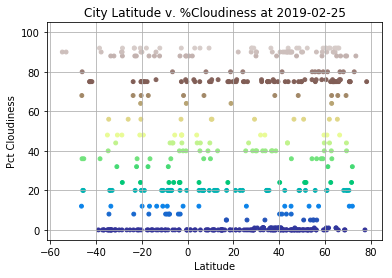

In [22]:
# chose the terrain colormap to better indicate cloud level
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness"], c=city_data_df["Cloudiness"],s=15, cmap = "terrain", marker = "o")
plt.title(f"City Latitude v. %Cloudiness at {time}")
plt.xlabel("Latitude")
plt.ylabel("Pct Cloudiness")
plt.grid()

# save and show the plot
plt.savefig("images/Lat_v_Clouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

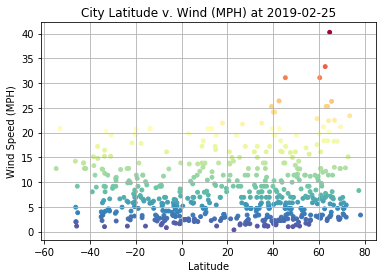

In [15]:
# chose the reversed Spectral colormap to better indicate wind intensity
plt.scatter(city_data_df["Latitude"], city_data_df["Wind Speed"], c=city_data_df["Wind Speed"], s=15, cmap = "Spectral_r", marker = "o")
plt.title(f"City Latitude v. Wind (MPH) at {time}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()

# save and show the plot
plt.savefig("images/Lat_v_Wind.png")
plt.show()